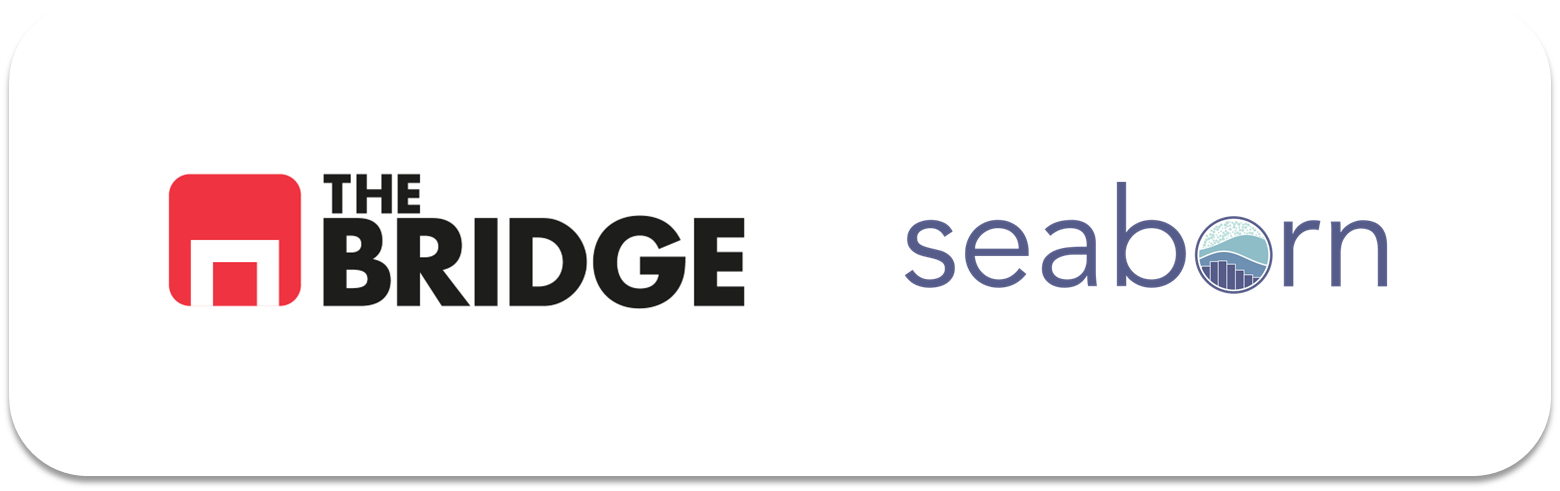

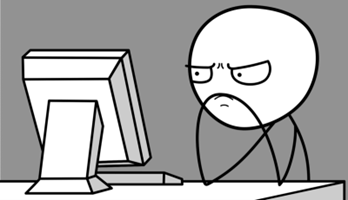

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [81]:
# Cargar los datasets
titanic_df = pd.read_csv("./data/titanic.csv")
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")



# Mostrar un vistazo a los tres datasets
titanic_df.head(), viajes_df.head()

(   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 1         1       1  female  38.0      1      0  71.2833        C  First   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 3         1       1  female  35.0      1      0  53.1000        S  First   
 4         0       3    male  35.0      0      0   8.0500        S  Third   
 
      who  adult_male deck  embark_town alive  alone  
 0    man        True  NaN  Southampton    no  False  
 1  woman       False    C    Cherbourg   yes  False  
 2  woman       False  NaN  Southampton   yes   True  
 3  woman       False    C  Southampton   yes  False  
 4    man        True  NaN  Southampton    no   True  ,
    aircompany      origen      destino  distancia        avion  con_escala  \
 0      Airnar       París      Ginebra        411   Boeing 737       False   
 1        FlyQ        Bali         Roma      12

In [82]:
print(viajes_df.columns)
print(titanic_df.columns)

Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [83]:
def analyze_categorical_columns(dataframe, column1, column2):
    """
    Analiza dos columnas categóricas en un dataframe.
    
    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        column1 (str): Nombre de la primera columna categórica.
        column2 (str): Nombre de la segunda columna categórica.
    
    Returns:
        pd.DataFrame: Tabla de contingencia de las dos columnas.
    """
    # Crear subplots para las frecuencias absolutas
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    # Gráfico de frecuencias para column1
    sns.countplot(data=dataframe, x=column1, ax=axes[0])
    axes[0].set_title(f"Frecuencias Absolutas de {column1}", fontsize=14)
    axes[0].set_xlabel(column1, fontsize=12)
    axes[0].set_ylabel("Frecuencia", fontsize=12)

    # Gráfico de frecuencias para column2
    sns.countplot(data=dataframe, x=column2, ax=axes[1])
    axes[1].set_title(f"Frecuencias Absolutas de {column2}", fontsize=14)
    axes[1].set_xlabel(column2, fontsize=12)
    axes[1].set_ylabel("Frecuencia", fontsize=12)

    plt.show()

    # Crear un catplot para la relación entre las columnas categóricas
    sns.catplot(data=dataframe, x=column1, col=column2, kind="count", height=5, aspect=1.2)
    plt.show()

    # Tabla de contingencia
    contingency_table = pd.crosstab(dataframe[column1], dataframe[column2])
    return contingency_table

# Ejemplo de uso (requiere un dataframe cargado como 'titanic_df'):
# table = analyze_categorical_columns(titanic_df, 'sex', 'embarked')
# print(table)



### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

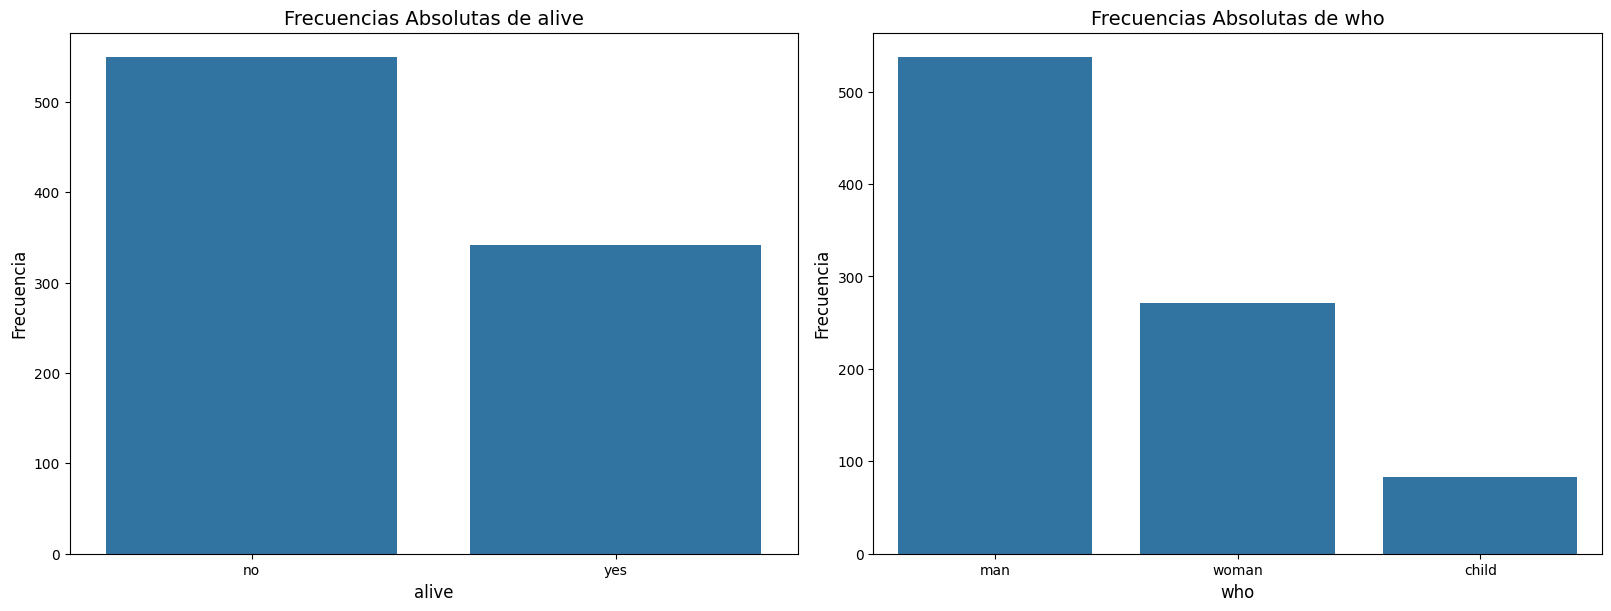

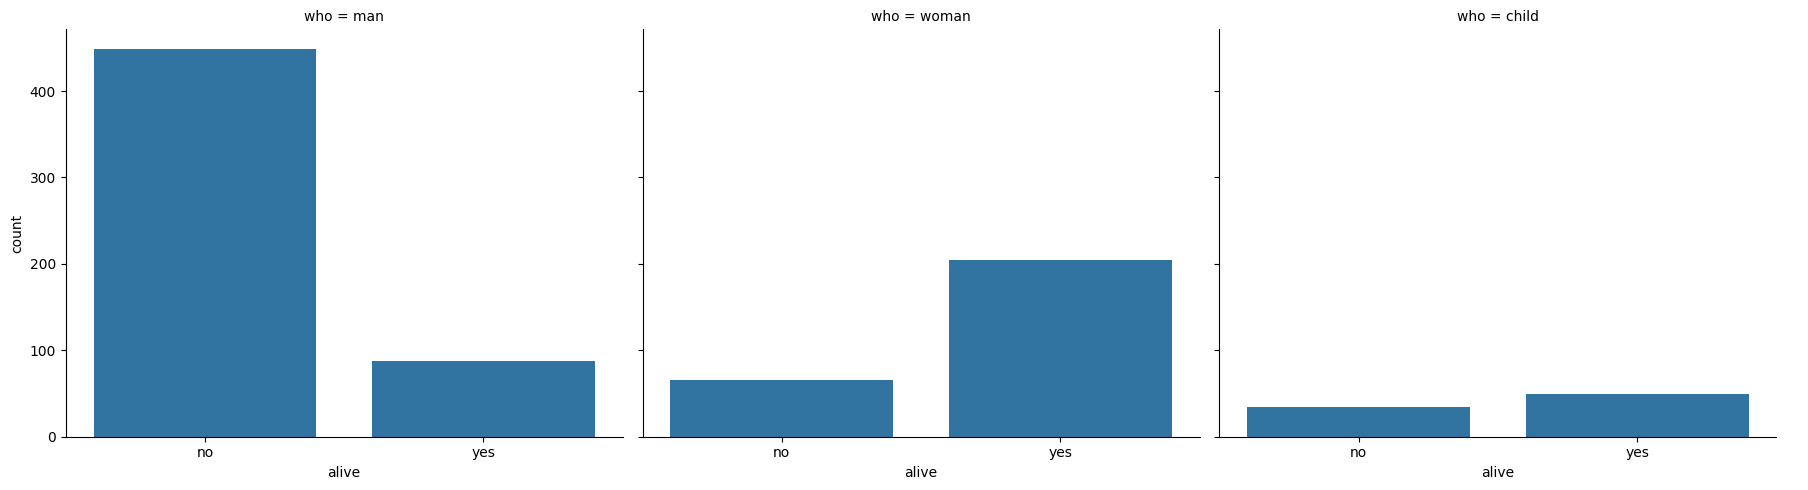

who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205


In [84]:
# Cargar el dataset del Titanic
titanic_df = pd.read_csv("./data/titanic.csv")

# Aplicar la función para analizar "alive" y "who"
contingency_table = analyze_categorical_columns(titanic_df, 'alive', 'who')
print(contingency_table)


#### Alive y Class

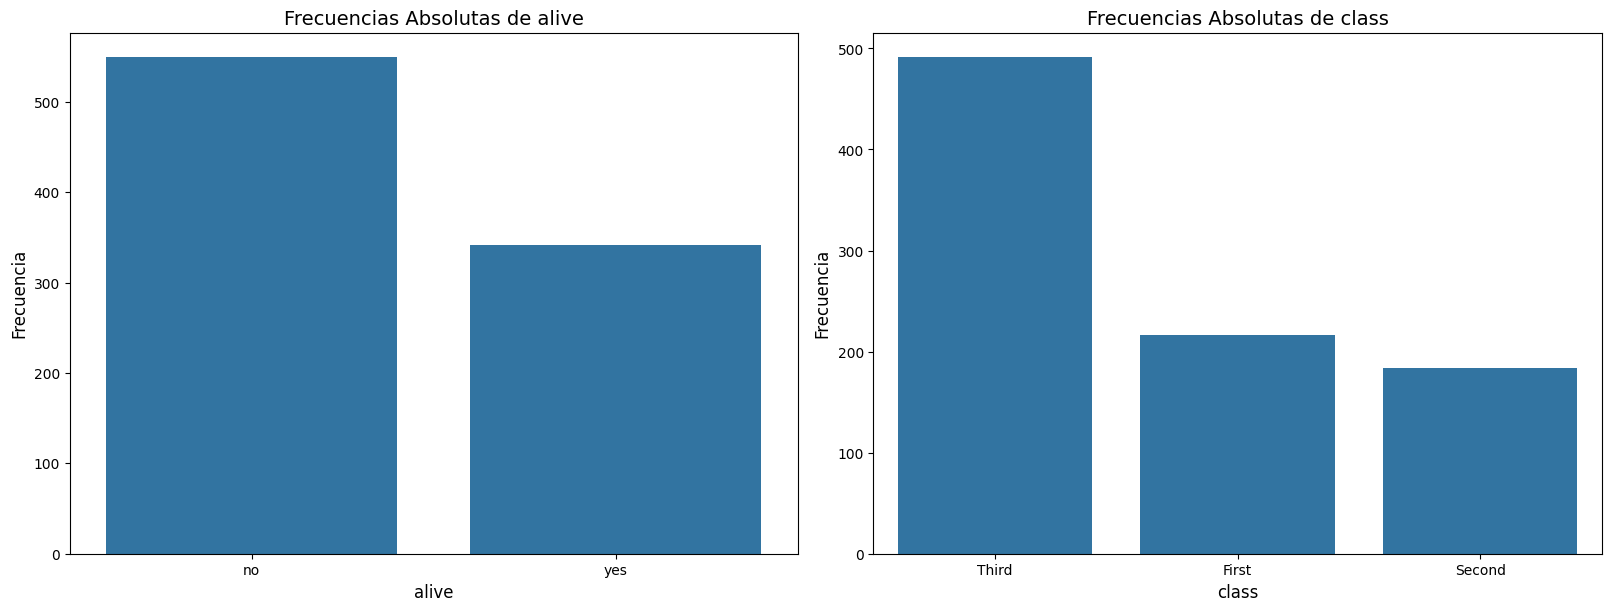

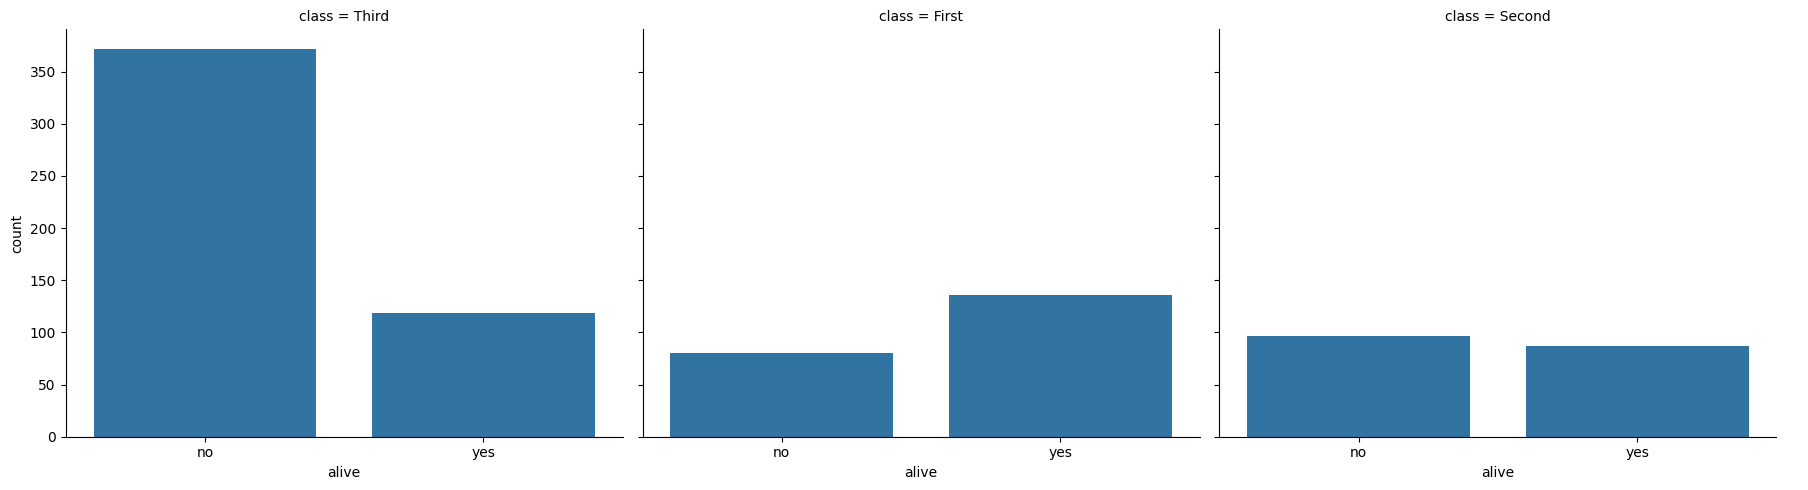

class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119


In [85]:
# Cargar el dataset del Titanic
titanic_df = pd.read_csv("./data/titanic.csv")

# Aplicar la función para analizar "alive" y "class"
contingency_table = analyze_categorical_columns(titanic_df, 'alive', 'class')
print(contingency_table)


### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [86]:
def compare_categorical_and_numerical(dataframe, categorical_column, numerical_column):
    """
    Compara una variable categórica y una numérica mediante histogramas.
    
    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        categorical_column (str): Nombre de la columna categórica.
        numerical_column (str): Nombre de la columna numérica.
    """
    # Obtener los valores únicos de la columna categórica
    unique_values = dataframe[categorical_column].dropna().unique()
    
    # Determinar el número de columnas y filas necesarias
    num_columns = 3  # Máximo de columnas por fila
    num_rows = math.ceil(len(unique_values) / num_columns)
    
    # Crear la figura y los subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Aplanar los ejes para fácil indexación
    
    for i, value in enumerate(unique_values):
        ax = axes[i]
        subset = dataframe[dataframe[categorical_column] == value]
        sns.histplot(subset[numerical_column], bins=20, kde=False, ax=ax)
        ax.set_title(f"Histograma de {numerical_column} para el valor {value}", fontsize=12)
        ax.set_xlabel(numerical_column, fontsize=10)
        ax.set_ylabel("Frecuencia", fontsize=10)
    
    # Ocultar subplots vacíos si hay más subplots que valores únicos
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.show()

# Ejemplo de uso (requiere un dataframe cargado como 'titanic_df'):
# compare_categorical_and_numerical(titanic_df, 'class', 'age')


### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

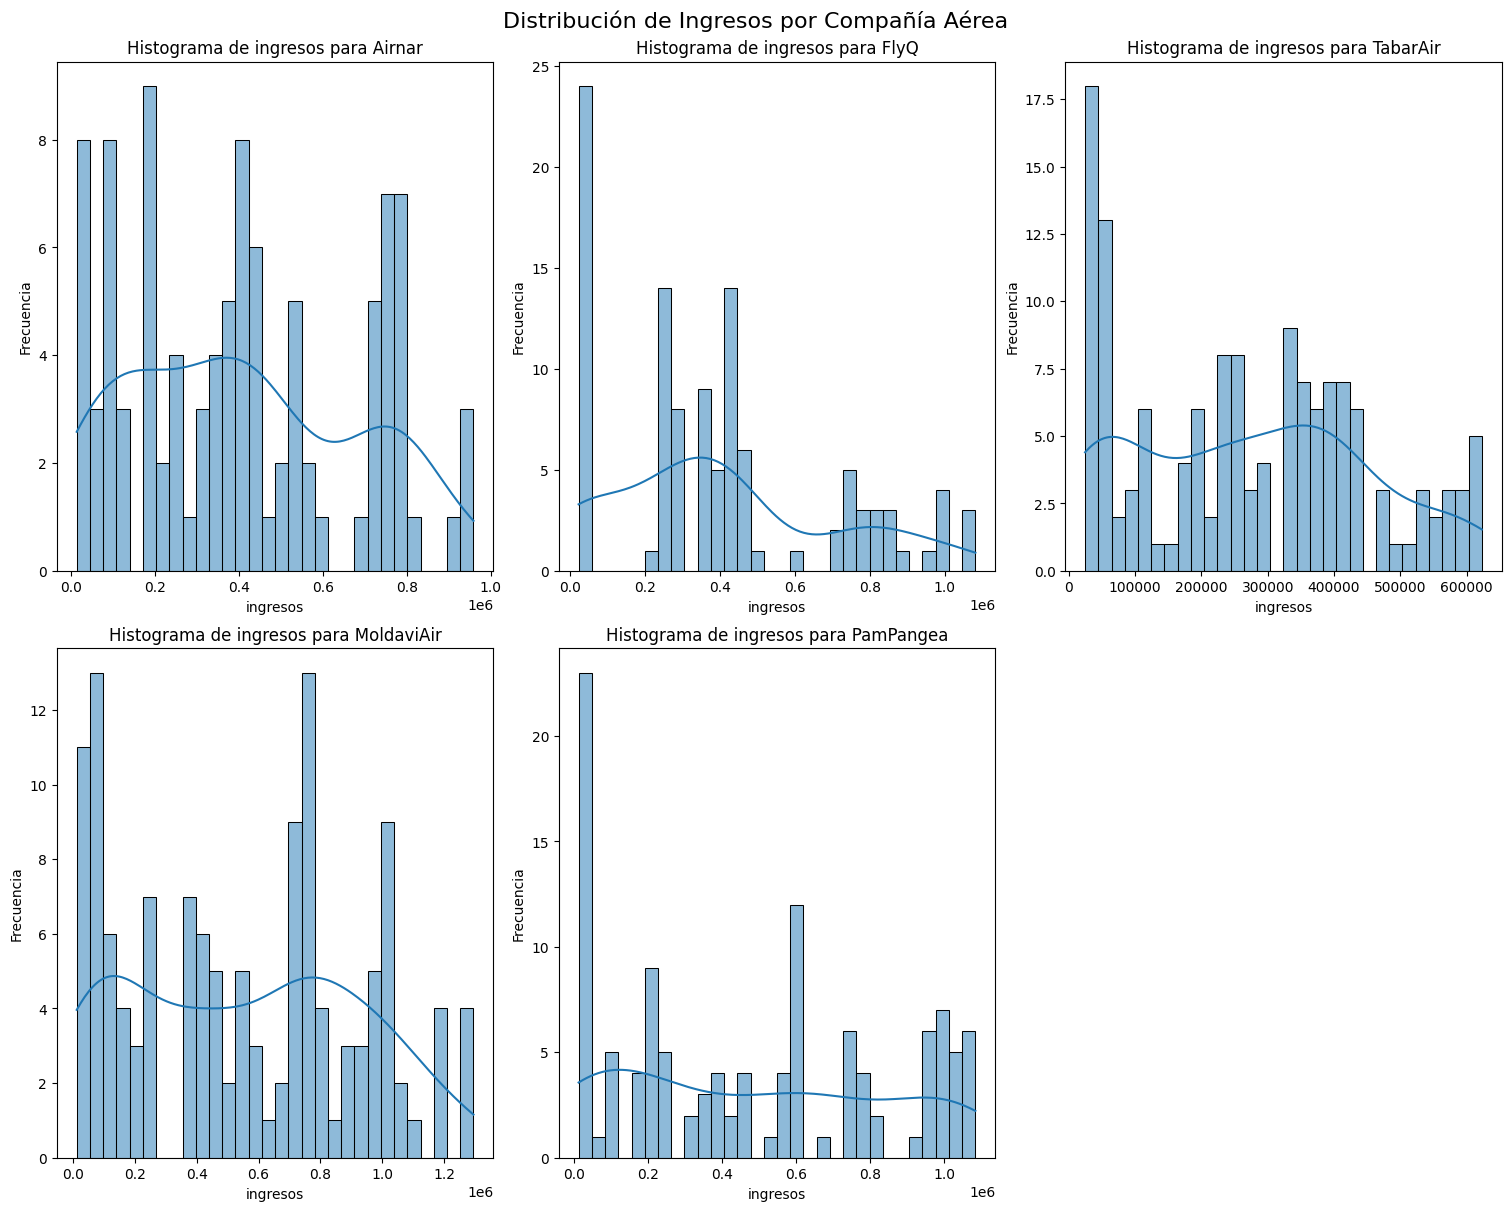

In [87]:
# Cargar el dataset de viajes
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Aplicar la función para analizar "ingresos" por "aircompany"
compare_categorical_and_numerical_improved(
    viajes_df,
    'aircompany',  # Variable categórica
    'ingresos',    # Variable numérica
    bins=30,       # Ajustar los bins para más detalle
    kde=True,      # Incluir la función de densidad
    main_title="Distribución de Ingresos por Compañía Aérea",
    figsize=(15, 6)
)



#### Aircompany y Consumo_kg

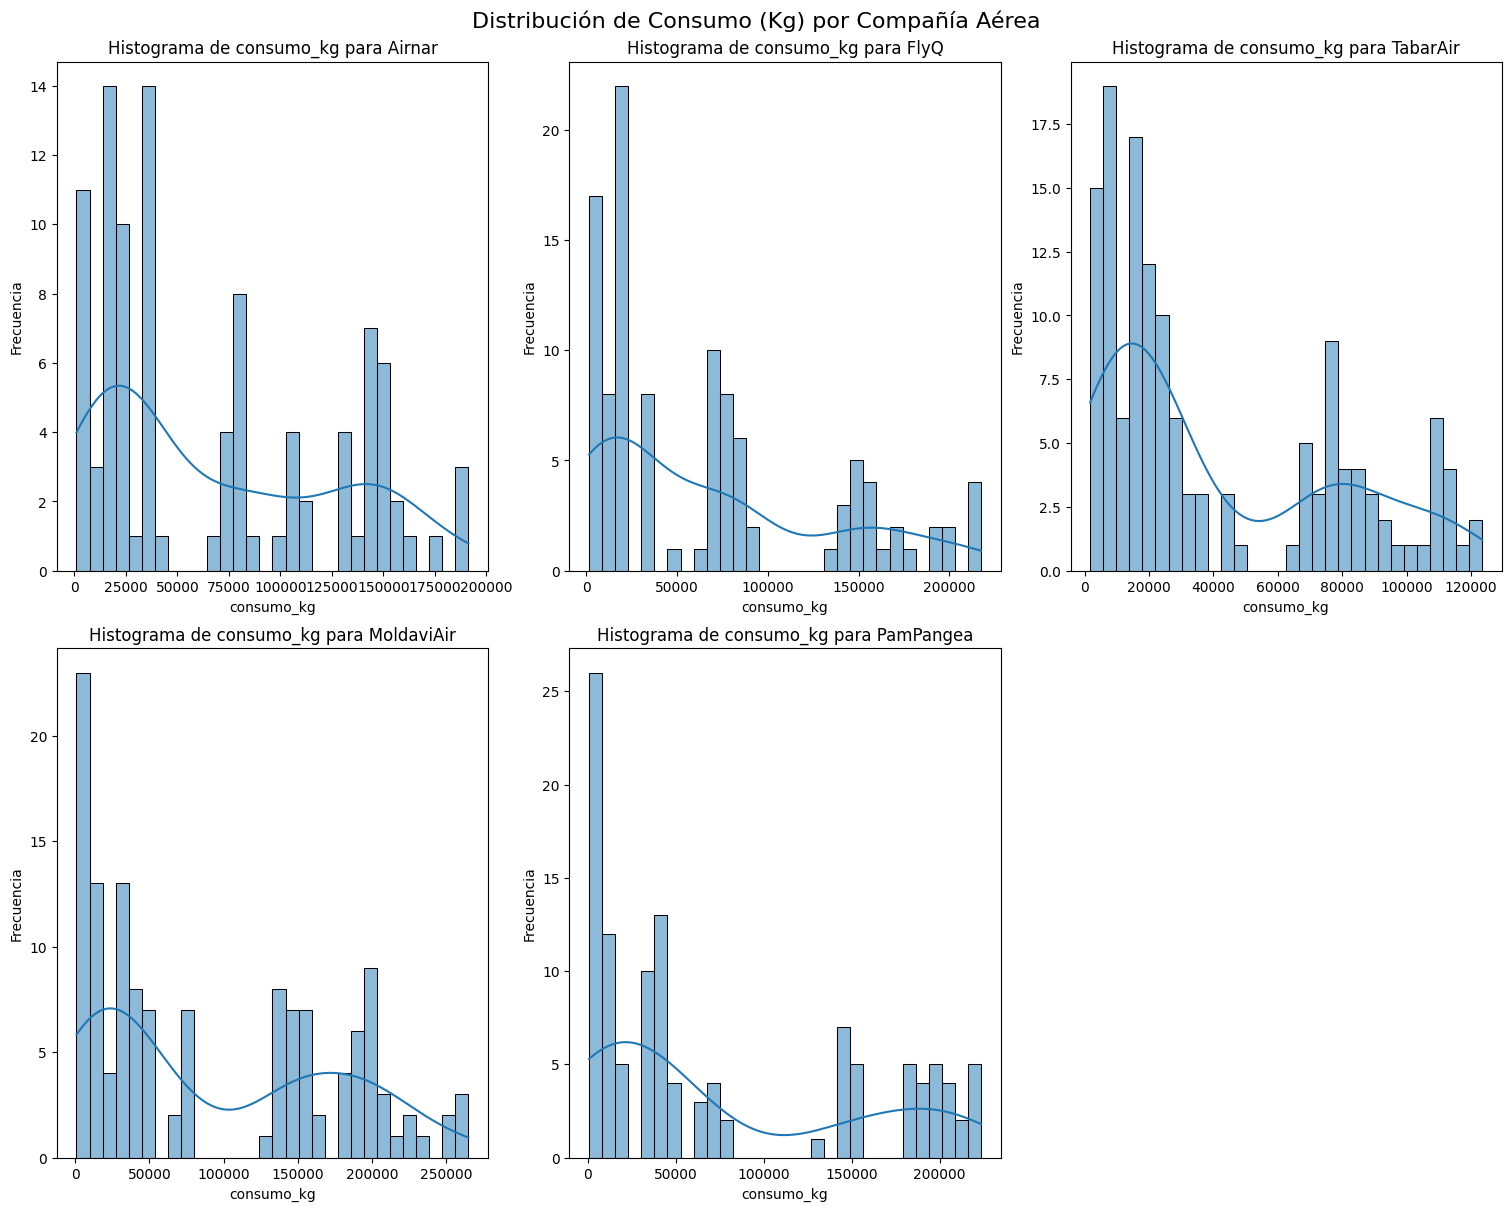

In [88]:
# Cargar el dataset de viajes
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Aplicar la función para analizar "consumo_kg" por "aircompany"
compare_categorical_and_numerical_improved(
    viajes_df,
    'aircompany',  # Nombre corregido de la columna categórica
    'consumo_kg',  # Variable numérica
    bins=30,       # Ajustar los bins para más detalle
    kde=True,      # Incluir la función de densidad
    main_title="Distribución de Consumo (Kg) por Compañía Aérea",
    figsize=(15, 6)
)




### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [89]:
def scatter_plot(dataframe, num_col_x, num_col_y, cat_col=None, point_size=50):
    """
    Crea un diagrama de dispersión de dos columnas numéricas con opción de colorear por una columna categórica.

    Args:
        dataframe (pd.DataFrame): El dataframe con los datos.
        num_col_x (str): Nombre de la columna numérica para el eje X.
        num_col_y (str): Nombre de la columna numérica para el eje Y.
        cat_col (str, optional): Nombre de la columna categórica para colorear los puntos. Default es None.
        point_size (int): Tamaño de los puntos en el diagrama. Default es 50.
    """
    plt.figure(figsize=(10, 6))
    
    if cat_col:
        # Diagrama de dispersión con colores según la columna categórica
        sns.scatterplot(data=dataframe, x=num_col_x, y=num_col_y, hue=cat_col, s=point_size)
    else:
        # Diagrama de dispersión sin colores categóricos
        sns.scatterplot(data=dataframe, x=num_col_x, y=num_col_y, s=point_size)
    
    plt.title(f"Diagrama de dispersión: {num_col_x} vs {num_col_y}", fontsize=14)
    plt.xlabel(num_col_x, fontsize=12)
    plt.ylabel(num_col_y, fontsize=12)
    plt.legend(title=cat_col, loc="best") if cat_col else None
    plt.show()

# Ejemplo de uso:
# scatter_plot(viajes_df, 'ingresos', 'consumo_kg', cat_col='aircompany', point_size=100)


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

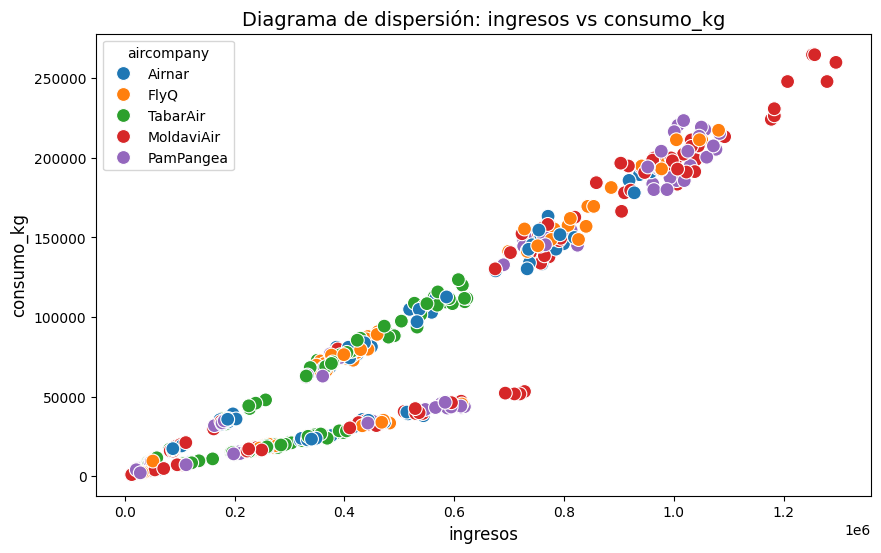

In [90]:
# Cargar el dataset de viajes
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Aplicar la función para analizar la relación entre ingresos, consumo_kg y compañía aérea
scatter_plot(viajes_df, 'ingresos', 'consumo_kg', cat_col='aircompany', point_size=100)


### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

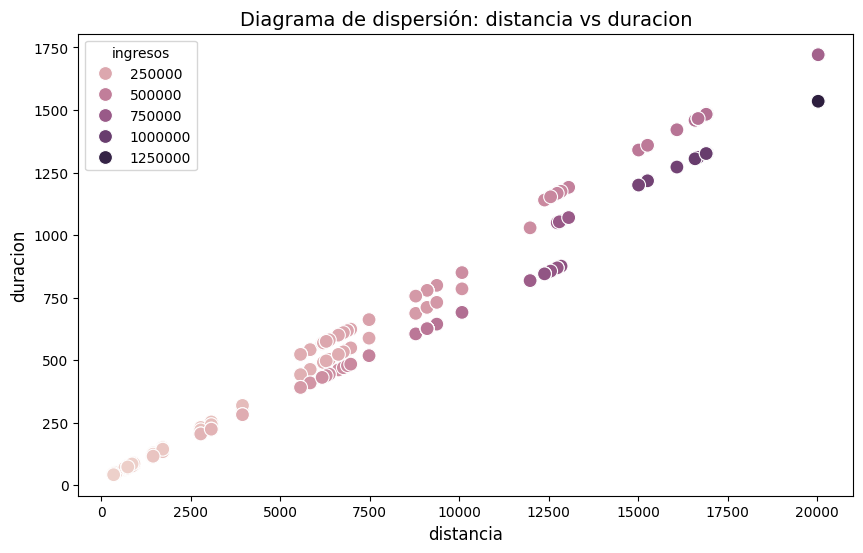

In [91]:
# Cargar el dataset de viajes
viajes_df = pd.read_csv("./data/dataset_viajes_jun23.csv")

# Aplicar la función para analizar la relación entre distancia, duración e ingresos
scatter_plot(viajes_df, 'distancia', 'duracion', cat_col='ingresos', point_size=100)
